In [16]:
# Import standard libraries for analysis and BigQuery access
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery
import os

#### **Set up libraries and authentication**

This notebook uses `pandas` and `matplotlib` for basic analysis and plotting.
Google BigQuery access is handled via a service account JSON file placed under the `creds/` directory.

In [17]:
# Load service account credentials and create BigQuery client
credentials_path = "../creds/gcp_service_account.json"
credentials = service_account.Credentials.from_service_account_file(credentials_path)

project_id = credentials.project_id
client = bigquery.Client(credentials=credentials, project=project_id)

#### **Load data from BigQuery**

We retrieve the full `trip_summary_hourly` table and load it into a pandas DataFrame.
This table is already aggregated at the hourly level, ordered by `pickup_hour`.

In [18]:
# Query BigQuery to retrieve hourly summary table
query = """
    SELECT *
    FROM `precise-antenna-461516-u3.nyc_taxi.trip_summary_hourly`
    ORDER BY pickup_hour
"""

df = client.query(query).to_dataframe()

In [19]:
# Quick look at data
df.head()

,pickup_hour,trip_count,avg_fare,avg_tip,total_passengers,avg_distance
0,2023-01-01 00:00:00,5217,18.94,3.45,7753.0,3.39
1,2023-01-01 01:00:00,5558,18.73,3.51,8056.0,3.35
2,2023-01-01 02:00:00,4943,18.38,3.44,6946.0,3.44
3,2023-01-01 03:00:00,3804,18.90,3.36,5004.0,3.61
4,2023-01-01 04:00:00,2380,20.09,3.31,3225.0,3.98


In [20]:
# Create column for hour of day (0-23)
df["pickup_hour_of_day"] = df["pickup_hour"].dt.hour

# Group by hour of day and calculate average values
hourly_avg = df.groupby("pickup_hour_of_day").agg({
    "trip_count": "mean",
    "avg_fare": "mean",
    "avg_tip": "mean",
    "total_passengers": "mean",
    "avg_distance": "mean"
}).reset_index()


#### **Hourly trend - trip count**

This plot shows how total ride volume fluctuates by hour from January to March 2023.
It can help surface demand peaks, such as morning/evening rush hours or late-night lows.


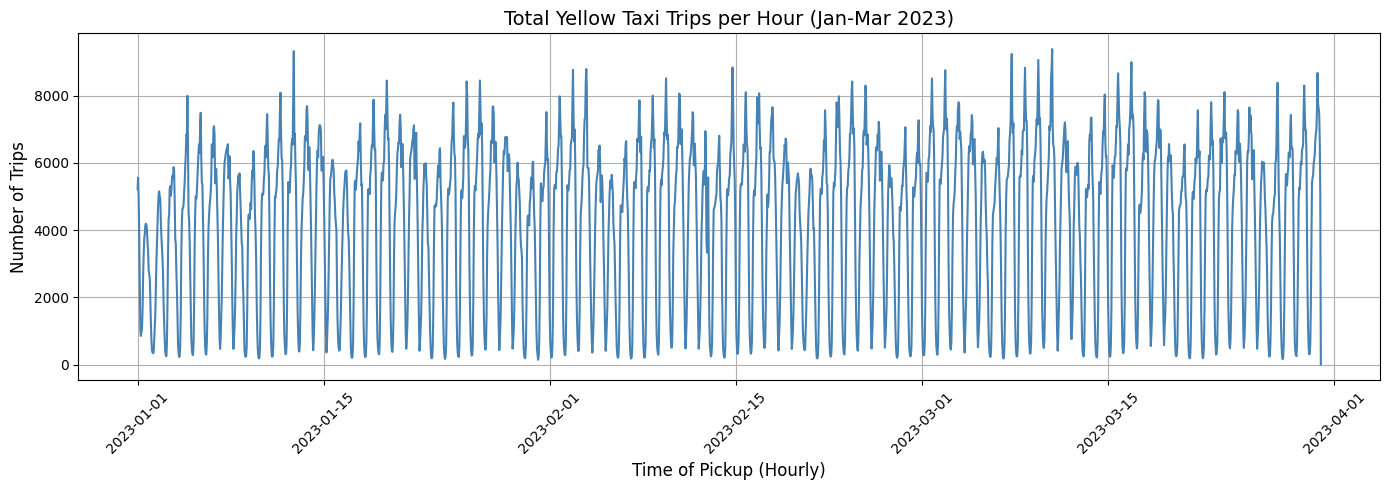

In [21]:
# Plot hourly trip count over time
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["trip_count"], label="Trip count", color="steelblue")
plt.title("Total Yellow Taxi Trips per Hour (Jan-Mar 2023)", fontsize=14)
plt.xlabel("Time of Pickup (Hourly)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average trip count by hour of day**

This chart shows the mean number of trips across each year of the day. The values are averaged across all days in the dataset.

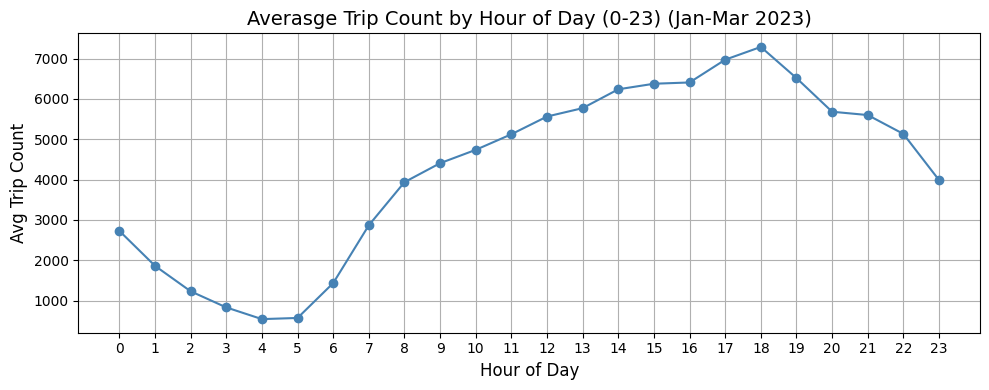

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["trip_count"], marker='o', color="steelblue")
plt.title("Averasge Trip Count by Hour of Day (0-23) (Jan-Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Trip Count", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – average fare**

This plot shows the average fare value at each pickup hour across the entire dataset.
The x-axis uses full timestamps, making it possible to observe how fare levels change over time.

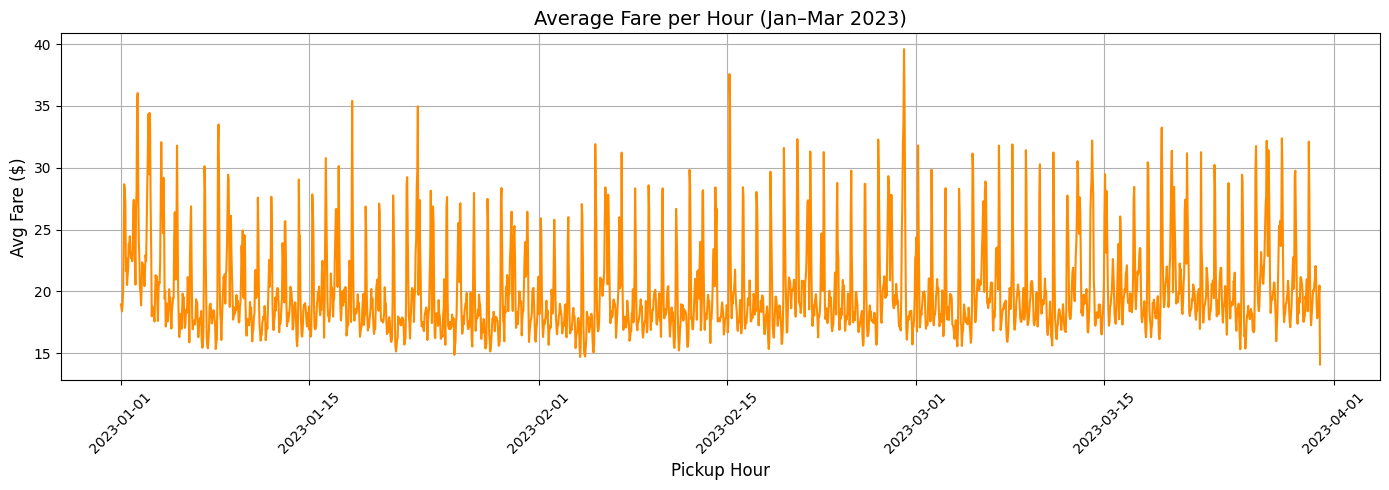

In [23]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["avg_fare"], color="darkorange")
plt.title("Average Fare per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Avg Fare ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average fare by hour of day**

This chart displays the average fare amount across each hour of the day.  
The values are computed by grouping all records by hour (0–23) and averaging the fare for each group.

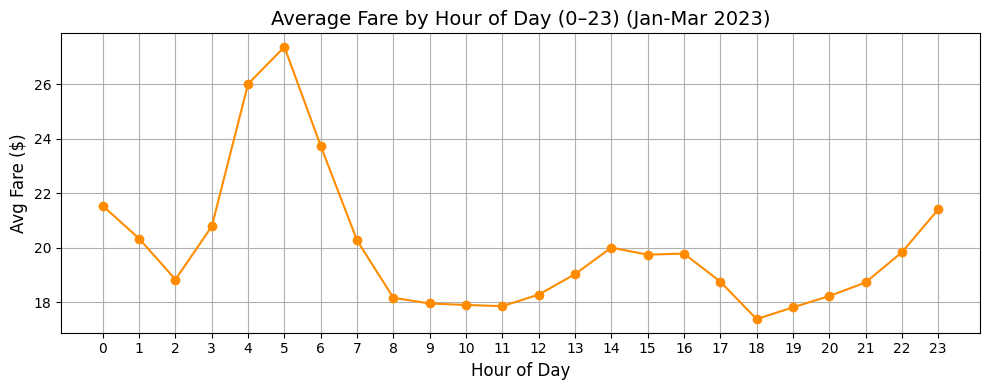

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["avg_fare"], marker='o', color="darkorange")
plt.title("Average Fare by Hour of Day (0–23) (Jan-Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Fare ($)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – average tip**

This chart shows the average tip amount for each hour in the dataset.
Full hourly timestamps allow for visualizing how tip behavior varies over time.

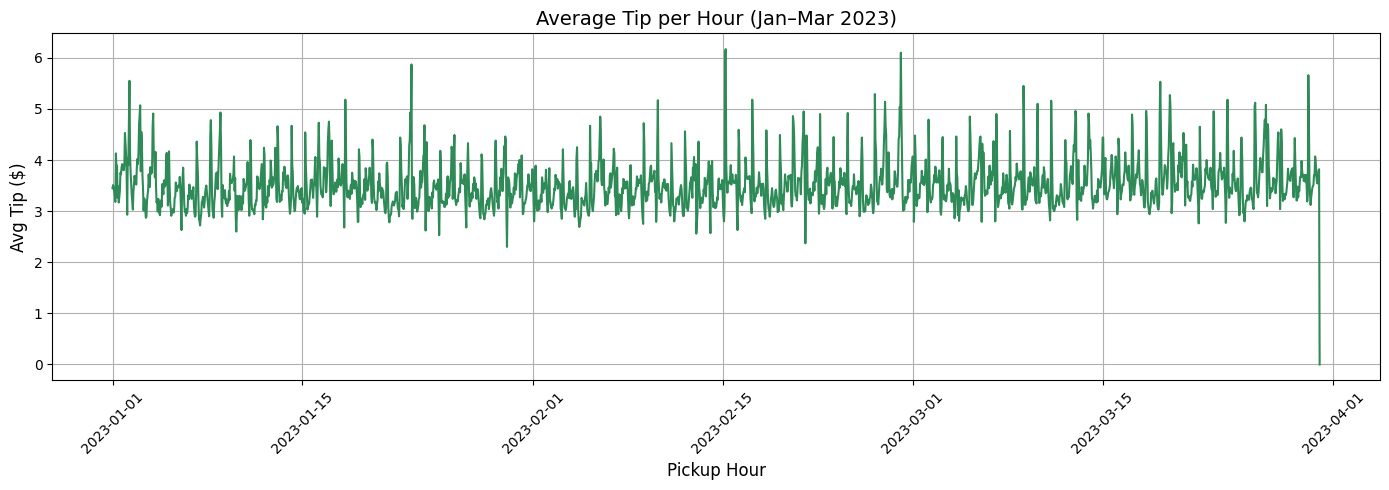

In [25]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["avg_tip"], color="seagreen")
plt.title("Average Tip per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Avg Tip ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average tip by hour of day**

This chart displays the average tip amount for each hour in a typical day, aggregated across the dataset.

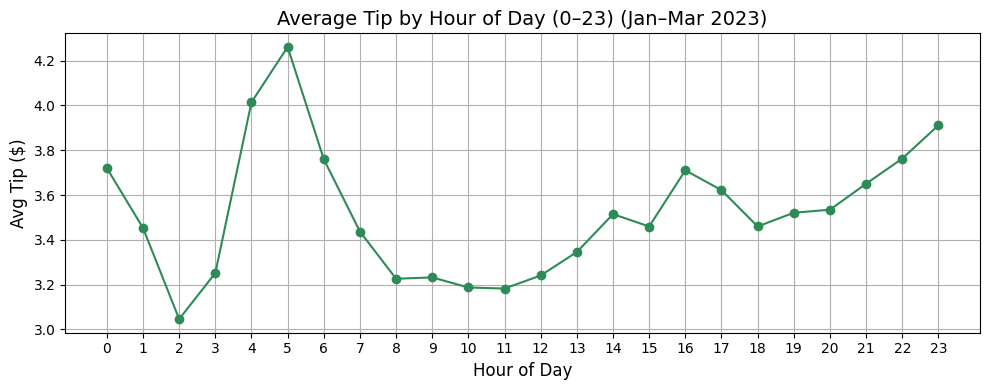

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["avg_tip"], marker='o', color="seagreen")
plt.title("Average Tip by Hour of Day (0–23) (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Tip ($)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Hourly trend – total passengers**
This chart displays the total number of passengers per pickup hour across the dataset.  
It reflects changes in overall ride volume during the January to March 2023 period.

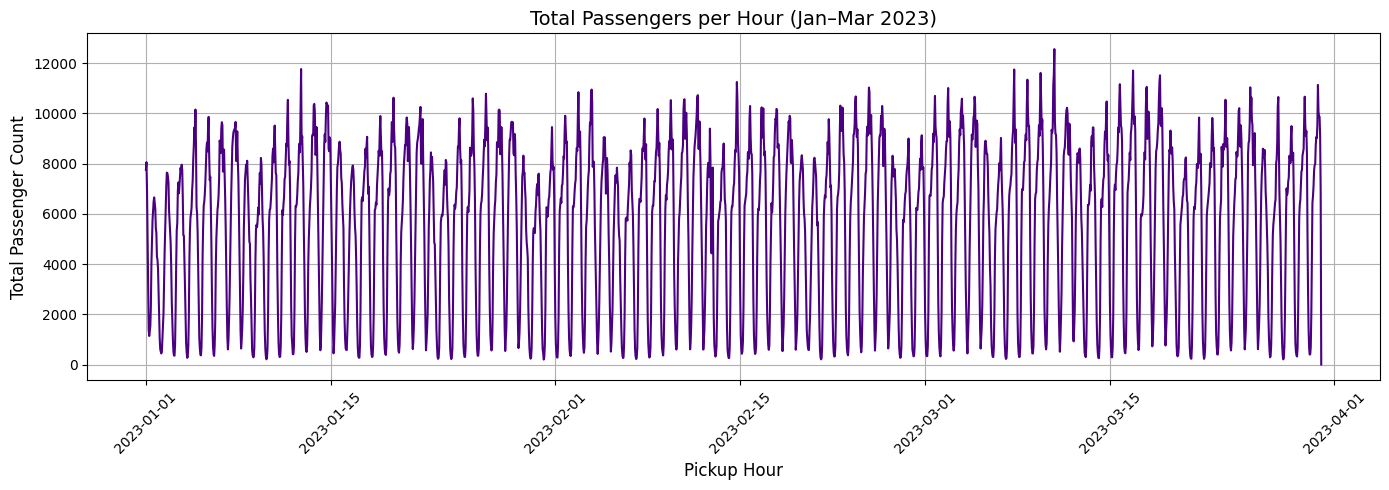

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["total_passengers"], color="indigo")
plt.title("Total Passengers per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Total Passenger Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average passenger count by hour of day**

This chart shows the average number of passengers per hour, averaged across the available records in the dataset.

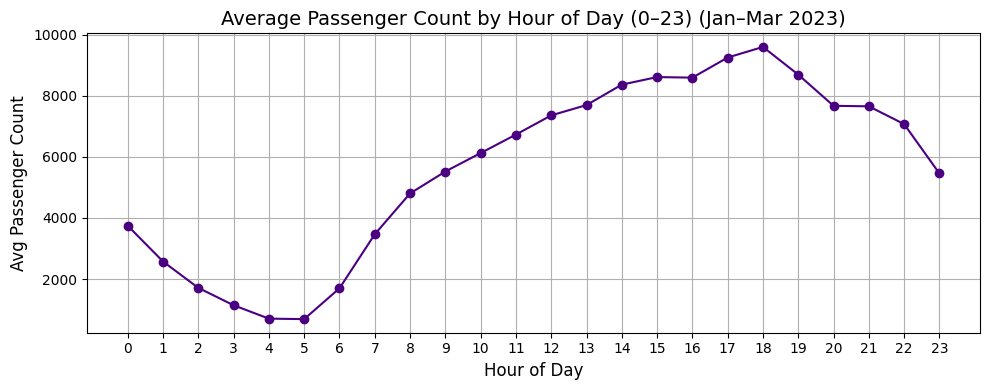

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["total_passengers"], marker='o', color="indigo")
plt.title("Average Passenger Count by Hour of Day (0–23) (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Passenger Count", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – average trip distance** 
This plot shows the average trip distance in miles, calculated for each pickup hour using the full timestamp.

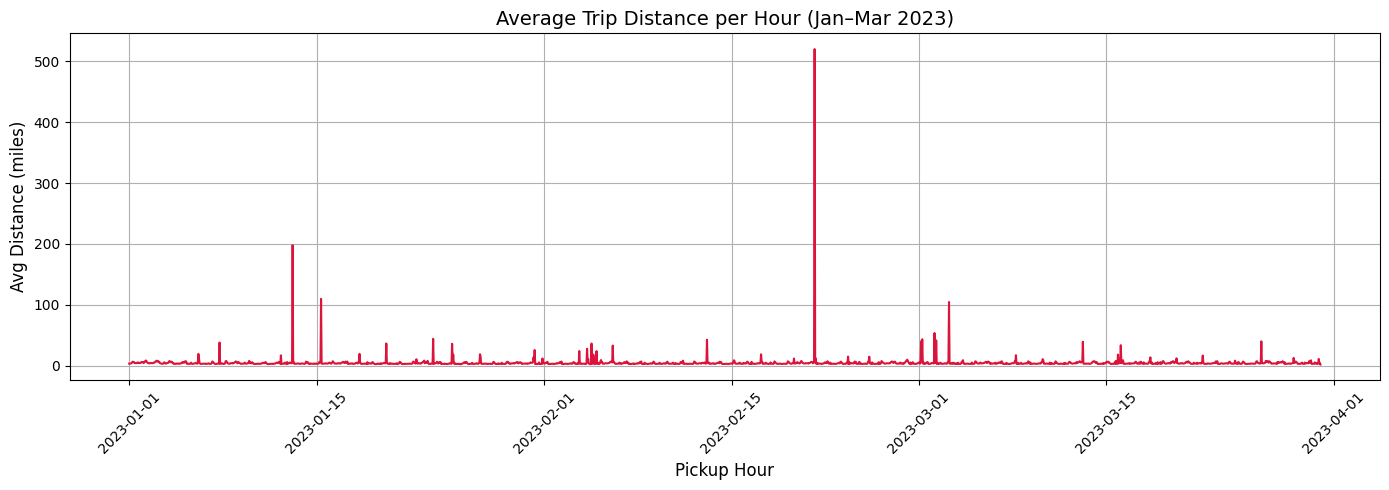

In [29]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["avg_distance"], color="crimson")
plt.title("Average Trip Distance per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Avg Distance (miles)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average trip distance by hour of day**

This plot shows the average trip distance in miles, grouped by hour of the day across the full dataset.

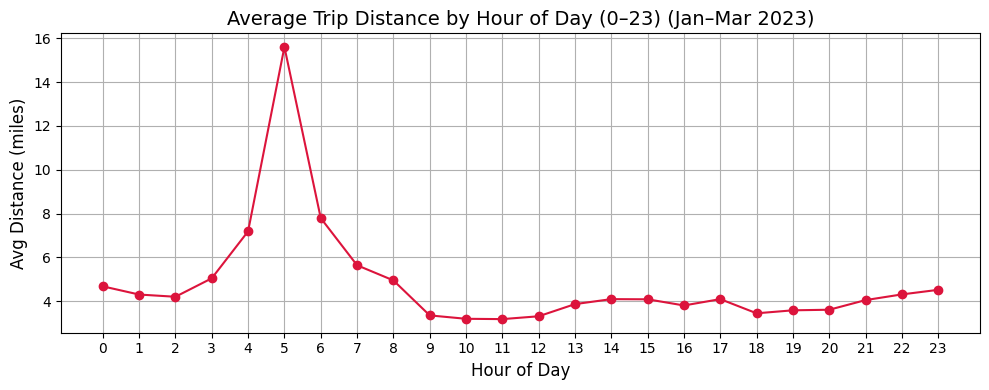

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["avg_distance"], marker='o', color="crimson")
plt.title("Average Trip Distance by Hour of Day (0–23) (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Distance (miles)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()